<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana10/NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [105]:
def Plotter(e):

  fig = plt.figure(figsize=(6,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)

  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax,ax1

In [106]:
G = np.array([lambda x,y: np.log(x**2+y**2) - np.sin(x*y) - np.log(2) - np.log(np.pi),
              lambda x,y: np.exp(x-y)+np.cos(x*y)])

In [107]:
def GetF(G,r):

  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = G[i](*r)

  return v

In [109]:
GetF(G,np.array([1.,1.]))

array([-1.98620087,  1.54030231])

In [110]:
def GetJacobian(f,r,h=1e-4):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] = rf[j] + h
      rb[j] = rb[j] - h

      J[i,j] = (f[i](*rf) - f[i](*rb))/(2*h)

  return J

In [111]:
J = GetJacobian(G,np.array([1.,1.]))
J

array([[ 0.45969769,  0.45969769],
       [ 0.15852902, -1.84147099]])

In [115]:
def Minimizer(G,r,epochs=int(1e5),error=1e-7):

  metric = 1
  it = 0

  M = np.array([])
  history = np.array([r])

  while metric > error and it < epochs:


    rc = r


    J = GetJacobian(G,r)
    Inv = np.linalg.inv(J)
    Vector = GetF(G,r)

    # Algoritmo de Newton Raphson General
    r = rc - np.dot(Inv,Vector)

    history = np.vstack((history,r))
    metric = np.linalg.norm(rc-r)
    M = np.append(M,metric)

    if it % 1 == 0:
      clear_output(wait=True)
      _,ax,ax1 = Plotter(it)
      ax.plot(history[:it])
      ax.legend(['$u_{}$: {:.8}'.format(i, r[i]) for i in range(len(r))])
      ax1.plot(M[:it],color='k',label='Metric {:.6f}'.format(M[-1]))
      ax1.legend()

      plt.show()

      time.sleep(0.01)

    it += 1

  return r

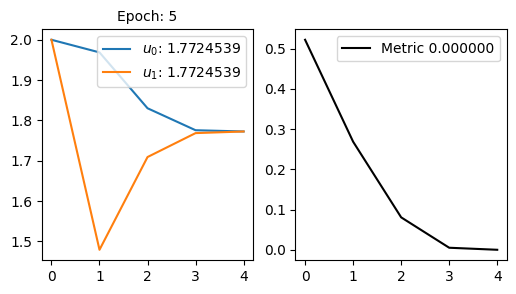

In [116]:
xsol = Minimizer(G,np.array([2.,2.]))

In [117]:
xsol

array([1.77245385, 1.77245385])

In [118]:
xsol

array([1.77245385, 1.77245385])

In [119]:
GetF(G,xsol)

array([2.22044605e-16, 0.00000000e+00])